In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
                'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
                'Proanthocyanins', 'Color_intensity', 'Hue',
                'OD280/OD315_of_diluted_wines', 'Proline']
wine_df = pd.read_csv('/content/sample_data/wine.data', header=None, names=column_names)

In [4]:
wine_df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
wine_df.isnull().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [5]:
X = wine_df.drop('Class', axis=1)
y = wine_df['Class']

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Cumulative Explained Variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


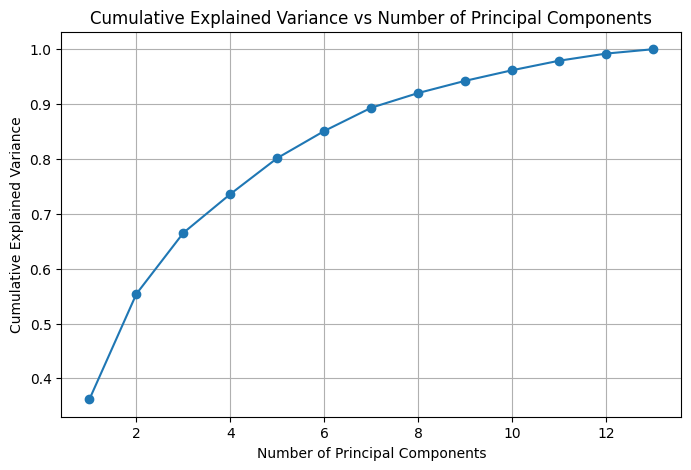

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid()
plt.show()

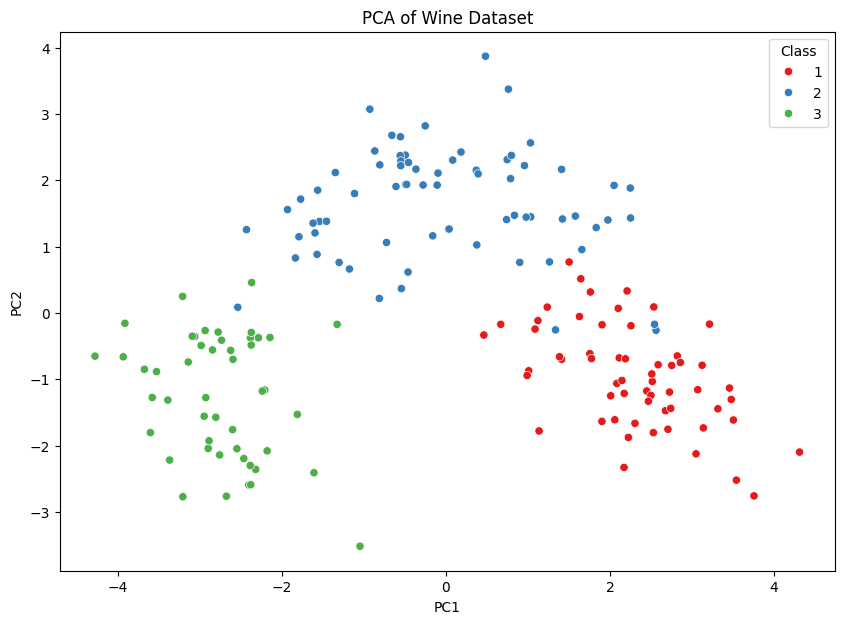

In [11]:
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set1')
plt.title('PCA of Wine Dataset')
plt.show()

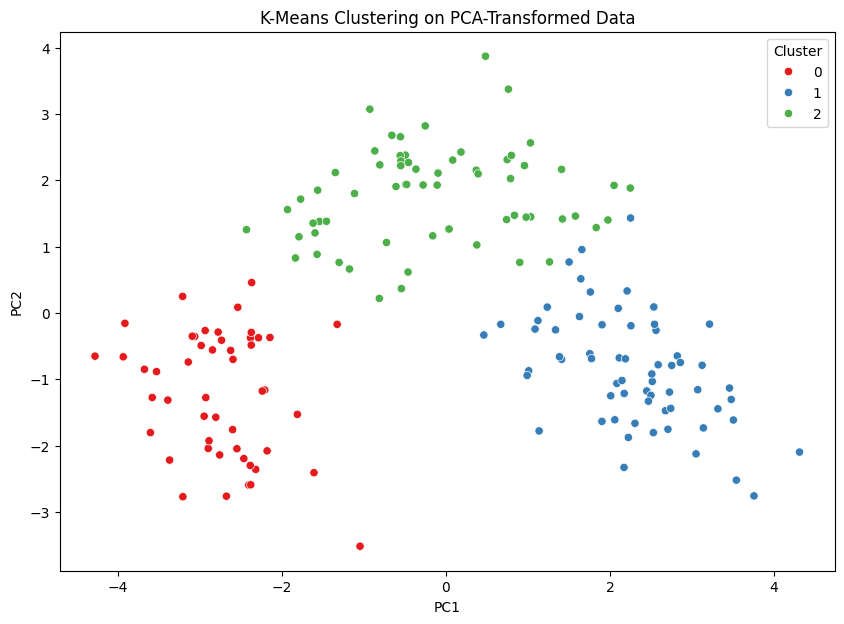

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_2d)

pca_df['Cluster'] = clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.show()

PCA Interpretation:
PCA reduced the dimensionality of the dataset while retaining most of the variance. The first few principal components capture the majority of the variability in the data, which simplifies the dataset while preserving its structure. The scatter plot of the first two principal components shows how the classes are distributed in this reduced space.

Clustering Interpretation:
The K-Means clustering algorithm grouped the PCA-transformed data into clusters. By visualizing these clusters, we can see the natural groupings within the dataset. The clusters should ideally correspond to the original classes, but discrepancies can occur due to the inherent differences in how PCA and K-Means interpret the data structure.